# Algorithms on graphs. Introduction to graphs and basic algorithms on graphs 

----- 


## Goal

The use of different representations of graphs and basic algorithms on graphs
(Depth-first search and Breadth-first search)

------ 

## Problems and methods

I. Generate a random adjacency matrix for a simple undirected unweighted graph with 100 vertices and 200 edges (note that the matrix should be symmetric and contain only 0s and 1s as elements). Transfer the matrix into an adjacency list. Visualize the graph and print several rows of the adjacency matrix and the adjacency list. Which purposes is each representation more convenient for?

II. Use Depth-first search to find connected components of the graph and Breadth-first search to find a shortest path between two random vertices. Analyse the results obtained.

III. Describe the data structures and design techniques used within the algorithms.

In [5]:
'''
    import lib
'''
import pandas 
from pandas import *
from random import randrange
import numpy as np 


In [6]:
#adjacency matrix 

edges  = [randrange(100) for i in range (400)]
adj_mat = np.zeros(shape=(100,100))
for i in range (200) : 
    a,b=edges[i],edges[i+200]
    while a==b : 
        b=randrange(100)
    while adj_mat[a,b] ==1 :
        a= randrange(100)
        b=randrange(100)
        
    adj_mat[a,b] =1
    adj_mat[b,a]=1

#to make sure we have exactly 200 edges the sum should be 200
check_edge_num = np.sum(adj_mat)
print(check_edge_num)

#to make sure no node have edge on itself !
check_diag = np.sum([adj_mat[i,i] for i in range(100)])
print(check_diag)    

400.0
0.0


In [7]:
#transform to adjacency list 
adj_lst = []
for i in range (100): 
    idxs = np.nonzero(adj_mat[i,:])
    adj_lst.append(idxs)
adj_lst=np.squeeze(np.array(adj_lst))

<ipython-input-7-4b51759c2d29>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  adj_lst=np.squeeze(np.array(adj_lst))


In [8]:
#just printing it ...
for i in range(2) : 
    print(adj_mat[i,:])
for i in range(2) : 
    print(adj_lst[i])


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
[]
[15 30 60]


In [9]:
#dfs 
def get_connected_group(node, visited,graph):
    result = [] 
    current_visited = node
    while not len(current_visited) ==0    :
       # print(current_visited)
        ngb = current_visited[0]
        current_visited =np.delete(current_visited,0)
        if ngb in visited : 
            continue 
        visited.append(ngb)
        result.append(ngb)
        reduced_ngb = [x for x in graph[ngb] if x not in visited]
        current_visited = [*current_visited , *reduced_ngb ] 
    return result,visited
     
        
    
def dfs_adj_lst(graph) :
    visited = [] 
    all_groups = []
    for node_idx, node in enumerate( graph) :
        if not node_idx in visited : 
            connected_group, visited = get_connected_group(node,visited,graph)
            connected_group.append(node_idx)
            all_groups.append(connected_group)
    return all_groups


def bfs_shortest_path(graph,start,end) : 
    queue = [(start,[start])]
    visited = set()

    while queue:
        vertex, path = queue.pop(0)
        visited.add(vertex)
        for node in graph[vertex]:
            if node == end:
                return path + [end]
            else:
                if node not in visited:
                    visited.add(node)
                    queue.append((node, path + [node]))
                    

In [10]:
res = dfs_adj_lst(adj_lst)
print(res)

[[0], [15, 30, 60, 1, 7, 17, 57, 64, 80, 74, 76, 78, 97, 21, 25, 48, 50, 71, 81, 83, 42, 87, 8, 11, 5, 40, 68, 20, 22, 31, 58, 79, 6, 55, 99, 38, 44, 69, 86, 33, 77, 89, 24, 73, 61, 67, 84, 85, 66, 36, 49, 91, 12, 32, 88, 92, 94, 62, 90, 95, 29, 93, 28, 19, 43, 65, 98, 52, 54, 34, 75, 4, 10, 26, 41, 82, 9, 46, 63, 45, 14, 51, 3, 37, 27, 70, 39, 13, 56, 47, 2, 96, 35, 72, 16, 53, 1], [59, 18, 18], [23]]


In [11]:
res = bfs_shortest_path(adj_lst,8,74)
print(res)

[8, 24, 78, 30, 74]


In [12]:
#correctness check ... 
print(adj_lst[8])
print(adj_lst[0])
print(adj_lst[74])

[17 24 83 87]
[]
[30 38 44 69 71 86]


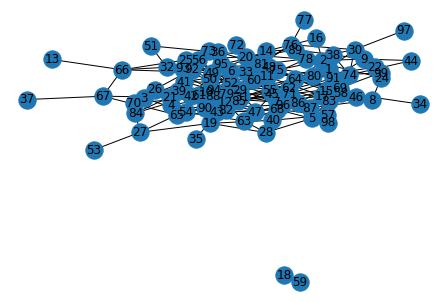

In [13]:
# importing networkx  
import networkx as nx 
# importing matplotlib.pyplot 
import matplotlib.pyplot as plt 
color_lst = ['red','black','green','white','blue']
g = nx.Graph() 
for i in range(100) : 
    for ngb in adj_lst[i] : 
        g.add_edge(i, ngb) 

  
nx.draw(g, with_labels=True)